In [86]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import utilities
import load_data as ld
import dataset_statistics as ds
import numpy as np

import embedder_generator as embgen

# Load dataset PROTEINS

### Dataset: DHFR
### Load and dataset statistics

In [88]:
#graphs, labels = ld.load_data_pubchem("generate_graphs/588350_pos_neg_BALANCED")
graphs, labels = ld.load_data("DHFR")

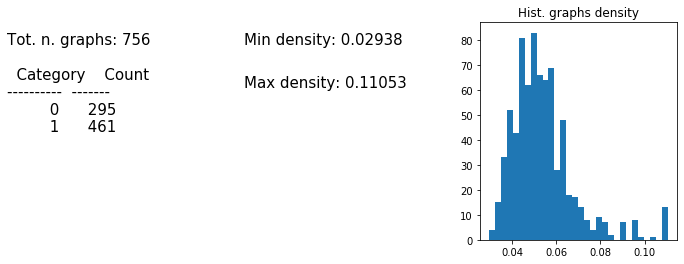

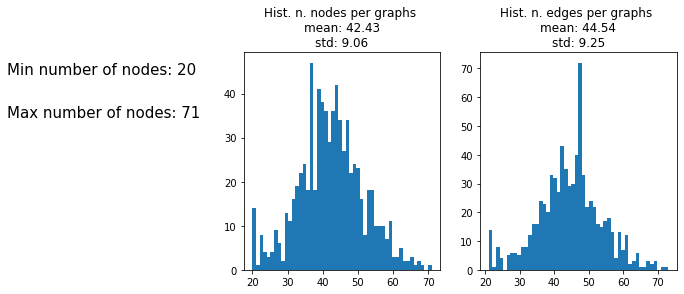

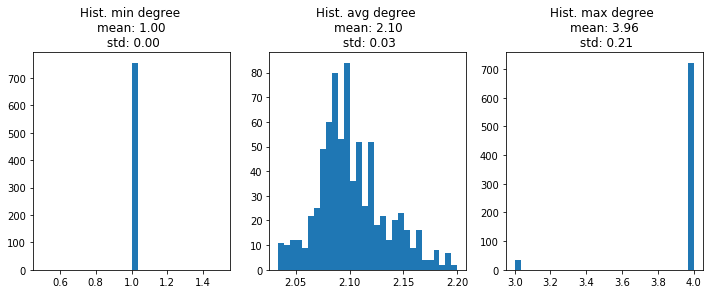

In [89]:
ds.summary(graphs,labels)

###  Preprocessing on graphs
Convert label in string and put it in vec

In [90]:
dic = utilities.create_dict_labels(graphs)
for g in graphs:
    for node in g.nodes():
        lab = g.nodes[node]['label']
        g.nodes[node]['vec'] = [dic[lab]]
for g in graphs:
    for edge in g.edges():
        g.edges[edge]['vec'] = []

In [91]:
functions = [utilities.vec_vertex]
graphs = utilities.add_info_to_nodes(graphs,functions,param=5)

max_n_nodes, n_attributes = utilities.find_shapes(graphs)
n_classes = len(np.unique(labels))

In [92]:
# generate baseline vectorize
emb_baseline_vec = embgen.gen_baseline_vectorize(complexity = 5,
                                             pca_n_components = 1000,
                                             emb_n_components = 2)

In [93]:
# generate baseline SpeKtral
emb_baseline_spk = embgen.gen_baseline_spk(n_classes = n_classes,
                                           max_n_nodes = max_n_nodes,
                                           n_attributes = n_attributes,
                                           spk_n_components=128,
                                           batch_size=32,
                                           validation_split=0.2,
                                           epochs=300,
                                           patience=50,
                                           emb_n_components=2)

In [94]:
# generate SpeKtral - Supervised Autoencoder - DNN
emb_spk_supAuto_dnn = embgen.gen_spk_supAuto_dnn(n_classes,max_n_nodes,n_attributes,
                                                spk_n_components = 128,
                                                auto_n_components = 32,
                                                emb_n_components = 2,
                                                spk_batch_size = 32,
                                                spk_validation_split = 0.2,
                                                spk_epochs = 300,
                                                spk_patience = 100,
                                                sauto_batch_size = 32,
                                                sauto_validation_split = 0.2,
                                                sauto_epochs=500,
                                                sauto_plateau=10,
                                                sauto_k=1,
                                                sauto_n_period=6,
                                                sauto_scale_c=0.001,
                                                sauto_scale_d=0.1,
                                                dnn_epochs=200,
                                                dnn_batch_size=32)

In [95]:
# generate Vectorize - PCA - Supervised Autoencoder - DNN
emb_vec_PCA_supAuto_dnn = embgen.gen_vect_supAuto_dnn(auto_n_components = 32,
                                            emb_n_components = 2,
                                            sauto_batch_size=32,
                                            sauto_validation_split=0.2,
                                            sauto_epochs=1000, #1000
                                            sauto_plateau=10,
                                            sauto_k=1,
                                            sauto_n_period=8, # 8
                                            sauto_scale_c=0.0001,
                                            sauto_scale_d=0.1,
                                            dnn_epochs=50,
                                            dnn_batch_size=32)

In [96]:
# generate Spektral - Supervised Autoencoder Embedder
emb_spk_supAutoEmb = embgen.gen_spk_supAutoEmb(n_classes,max_n_nodes,n_attributes,
                                                spk_n_components = 128,
                                                auto_n_components = 32,
                                                emb_n_components = 2,
                                                spk_batch_size = 32,
                                                spk_validation_split = 0.2,
                                                spk_epochs = 300,
                                                spk_patience = 100,
                                                sauto_batch_size = 32,
                                                sauto_validation_split = 0.2,
                                                sauto_epochs=1000,
                                                sauto_plateau=10,
                                                sauto_k=1,
                                                sauto_n_period=8,
                                                sauto_scale_c=0.001,
                                                sauto_scale_d=0.1,
                                                tb_folder=None)

In [97]:
# generate Vectorize - Supervised Autoencoder Embedder
emb_vec_supAutoEmb = embgen.gen_vec_supAutoEmb(n_classes,
                                                 auto_n_components = 32,
                                                 emb_n_components = 2,
                                                 sauto_batch_size=32,
                                                 sauto_validation_split=0.2,
                                                 sauto_epochs=500,
                                                 sauto_plateau=10,
                                                 sauto_k=1,
                                                 sauto_n_period=6,
                                                 sauto_scale_c=0.001,
                                                 sauto_scale_d=0.1,
                                                 tb_folder = None)

In [98]:
emb = [emb_baseline_vec,emb_baseline_spk,emb_spk_supAuto_dnn,emb_vec_PCA_supAuto_dnn,emb_spk_supAutoEmb,emb_vec_supAutoEmb]

In [99]:
vis = utilities.repeat_n_times(graphs,labels,emb,[2],1,seed=10,test_size=0.3)

	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: Vec-5 PCA-1000 UMAP-2
	 	 	  BASELINE: Spk(300)-128 UMAP-2
Stopped epoch:  167
	 	 	  Spk(300)-128 SupAuto(500)-32 UMAP-2
Stopped epoch:  187
	 	 	  Vect PCA-450 SupAuto(1000)-32 UMAP-2
	 	 	  Spk(300)-128 SupAuto(1000)-32 EMB-2
Stopped epoch:  177
	 	 	  Vect PCA-450 SupAuto(500)-32 EMB-2


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/pyt

In [101]:
vis.summary(std=True)
vis.rank()

                                          2    STD    mean
------------------------------------  -----  -----  ------
BASELINE: Vec-5 PCA-1000 UMAP-2       0.694  0.089   0.391
BASELINE: Spk(300)-128 UMAP-2         0.702  0.083   0.392
Spk(300)-128 SupAuto(500)-32 UMAP-2   0.675  0.107   0.391
Vect PCA-450 SupAuto(1000)-32 UMAP-2  0.749  0.069   0.409
Spk(300)-128 SupAuto(1000)-32 EMB-2   0.779  0.068   0.424
Vect PCA-450 SupAuto(500)-32 EMB-2    0.63   0.009   0.32
                                        2    mean
------------------------------------  ---  ------
BASELINE: Vec-5 PCA-1000 UMAP-2         4       4
BASELINE: Spk(300)-128 UMAP-2           3       3
Spk(300)-128 SupAuto(500)-32 UMAP-2     5       5
Vect PCA-450 SupAuto(1000)-32 UMAP-2    2       2
Spk(300)-128 SupAuto(1000)-32 EMB-2     1       1
Vect PCA-450 SupAuto(500)-32 EMB-2      6       6


In [84]:
##### OLD
vis.summary(std=False)
vis.rank()

                                          2    STD    mean
------------------------------------  -----  -----  ------
BASELINE: Vec-5 PCA-1000 UMAP-2       0.703  0.098   0.4
BASELINE: Spk(300)-128 UMAP-2         0.706  0.08    0.393
Spk(300)-128 SupAuto(500)-32 UMAP-2   0.684  0.055   0.37
Vect PCA-450 SupAuto(1000)-32 UMAP-2  0.753  0.04    0.396
Spk(300)-128 SupAuto(1000)-32 EMB-2   0.679  0.076   0.378
Vect PCA-450 SupAuto(500)-32 EMB-2    0.63   0.009   0.32
                                        2    mean
------------------------------------  ---  ------
BASELINE: Vec-5 PCA-1000 UMAP-2         3       3
BASELINE: Spk(300)-128 UMAP-2           2       2
Spk(300)-128 SupAuto(500)-32 UMAP-2     4       4
Vect PCA-450 SupAuto(1000)-32 UMAP-2    1       1
Spk(300)-128 SupAuto(1000)-32 EMB-2     5       5
Vect PCA-450 SupAuto(500)-32 EMB-2      6       6



	 BASELINE: Vec-5 PCA-1000 UMAP-2


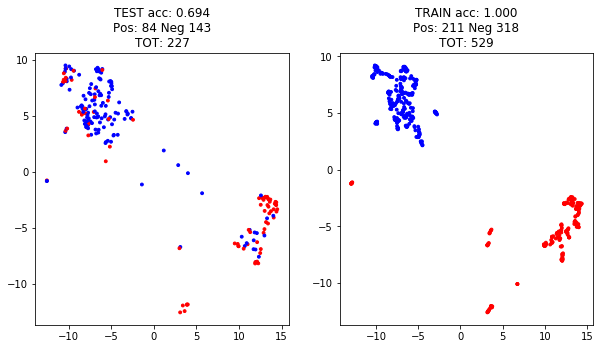


	 BASELINE: Spk(300)-128 UMAP-2


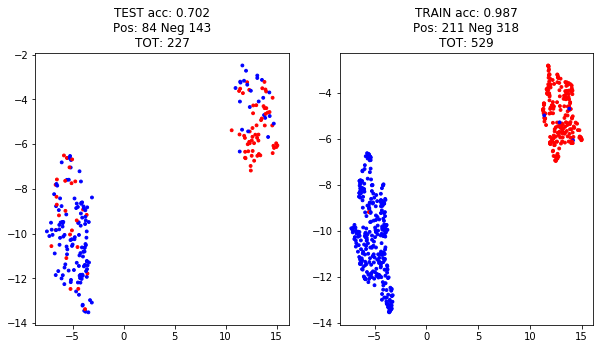


	 Spk(300)-128 SupAuto(500)-32 UMAP-2


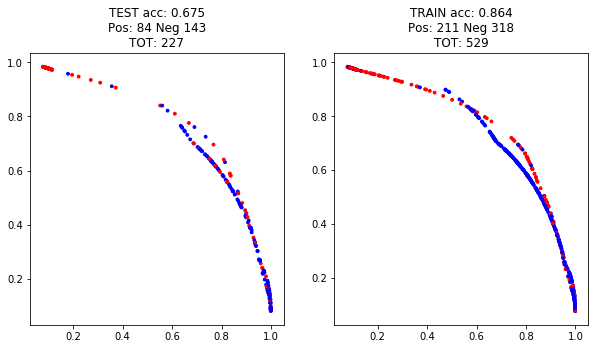


	 Vect PCA-450 SupAuto(1000)-32 UMAP-2


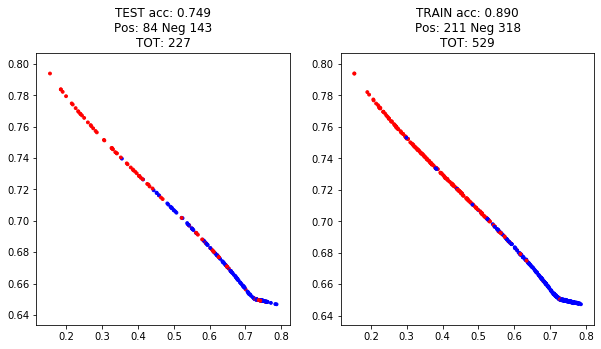


	 Spk(300)-128 SupAuto(1000)-32 EMB-2


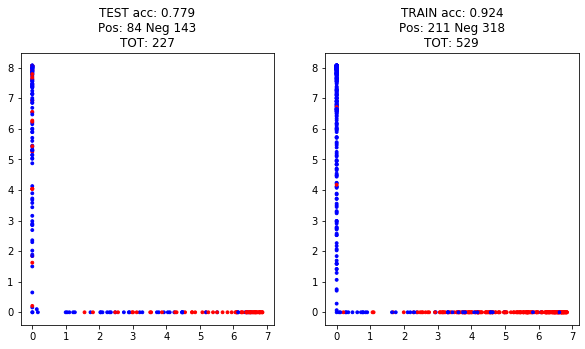


	 Vect PCA-450 SupAuto(500)-32 EMB-2


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/pyt

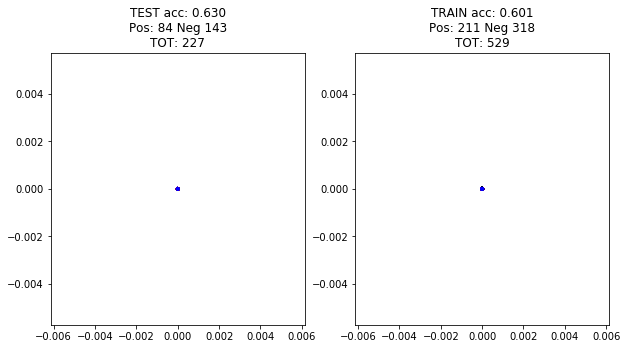

In [102]:
for e in emb:
    utilities.plot_embedding_2d(e,graphs,labels,seed=10,test_size=0.3)